<div style="direction:rtl">
در ابتدا، کتاخانه‌هایی که در طول پروژه به آن‌ها نیاز خواهیم داشت را اضافه می‌کنیم.
</div>

In [ ]:
!pip install tensorflow
!pip install keras
!pip install keras-tuner
!pip install xgboost
# !pip3 install torch

In [1]:
import numpy as np
import pandas as pd 
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

<div style="direction:rtl">
دیتاست را از روی فایل خوانده و ابعاد و چند سطر اول آن را نمایش می‌دهیم.
</div>

In [2]:
df = pd.read_csv('train_dataset.csv')
print(f'dataset shape: {df.shape}')
df.head()

dataset shape: (100000, 23)


,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,-1.0,-1,2020-08-04 04:07:56,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,-1,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,-1.0,-1,2020-08-04 01:47:40,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,-1.0,-1,2020-08-04 16:54:31,-1,0.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,-1,C45A9AC6D102ACAEEDF0D6F78636D84A,...,-1,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,-1.0,-1,2020-08-03 20:34:28,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,...,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,-1,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,-1.0,-1,2020-08-03 20:54:17,1064,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,-1,1B491180398E2F0390E6A588B3BCE291,...,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33


<div>
    <h1>EDA & Feature Engineering</h1>
    <hr>
</div>

<div style="direction:rtl">
نوع داده‌ی هر ستون از دیتاست در زیر مشخص شده است. ستون‌های از جنس
    object
    در واقع همان ستون‌های کتگوریکال در داده‌ها هستند. مشاهده می‌کنیم که اکثر ستون‌های داده از جنس کتگوریکال و تعداد کمی از جنس عددی هستند.
</div>

In [3]:
df.dtypes

Sale                           int64
SalesAmountInEuro            float64
time_delay_for_conversion      int64
click_timestamp               object
nb_clicks_1week                int64
product_price                float64
product_age_group             object
device_type                   object
audience_id                   object
product_gender                object
product_brand                 object
product_category(1)           object
product_category(2)           object
product_category(3)           object
product_category(4)           object
product_category(5)           object
product_category(6)           object
product_category(7)            int64
product_country               object
product_id                    object
product_title                 object
partner_id                    object
user_id                       object
dtype: object

<div style="direction:rtl">
در دو قسمت بعدی به ترتیب تعداد مقادیر یکتای هر ستون و تعداد خانه‌های درای مقدار
    Nan
    را بررسی می‌کنیم. برخی از ستون‌ها مانند
    click_timestamp, product_id, product_title, user_id
    از تعداد بیشتری مقادیر متمایز به نسبت سایر ستون‌ها برخوردارند.
    <br>
    در ضمن فقط ستون
    product_title
    دارای تعدادی مقدار
    Nan
    به صورت صریح است و باید مقادیر دیگر را به عنوان داده‌های 
    missing
    برای سایر ستون‌ها بررسی کنیم.
</div>

In [4]:
df.nunique(axis = 0)

Sale                             2
SalesAmountInEuro             8932
time_delay_for_conversion     9208
click_timestamp              67045
nb_clicks_1week               1138
product_price                 4496
product_age_group                9
device_type                      4
audience_id                   3182
product_gender                  11
product_brand                 4770
product_category(1)             22
product_category(2)            145
product_category(3)            699
product_category(4)            910
product_category(5)            442
product_category(6)             89
product_category(7)              1
product_country                 17
product_id                   45447
product_title                27695
partner_id                     183
user_id                      96766
dtype: int64

In [5]:
print(f'number of records: {len(df.index)}\n')
print('number of missing values in each column:')
print(df.isna().sum())

number of records: 100000

number of missing values in each column:
Sale                           0
SalesAmountInEuro              0
time_delay_for_conversion      0
click_timestamp                0
nb_clicks_1week                0
product_price                  0
product_age_group              0
device_type                    0
audience_id                    0
product_gender                 0
product_brand                  0
product_category(1)            0
product_category(2)            0
product_category(3)            0
product_category(4)            0
product_category(5)            0
product_category(6)            0
product_category(7)            0
product_country                0
product_id                     0
product_title                261
partner_id                     0
user_id                        0
dtype: int64


<div style="direction:rtl">
اطلاعات آماری کلی ستون‌های عددی داده‌ها را در زیر بررسی می‌کنیم.
    با توجی به این آمار، ستون 
    product_category(7)
    تماما از مقادیر 
    ۱-
    تشکیل شده است. همچنین در سایر ستون‌ها به جز
    Sale
    و
    nb_clicks_1week
    بخش زیادی (حداقل 75 درصد)
    از داده‌ها یک مقدار ثابت که به نظر همان مقدار متناظر با 
    missing value
    است را دارند.
</div>

In [6]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_category(7)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.136610,15.124148,43724.282270,236.545830,10.929187,-1.000000
std,0.343437,147.248702,243408.653698,1153.037285,65.574247,0.000000
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000
75%,0.000000,-1.000000,-1.000000,49.000000,0.000000,-1.000000
max,1.000000,23691.224980,2554631.000000,25390.000000,3928.000000,-1.000000


<div style="direction:rtl">
در ۳ بخش بعد تعداد مقادیر ناموجود برای ستون‌های مختلف را بررسی می‌کنیم. برای ستون‌های عددی به جز
    product_price
    مقدار
    ۱-
    ،
    برای ستون‌های کتگوریکال مقدار
    '1-'
    به معنی ناموجود و برای ستون
    product_price
    مقدار
    0
    به معنی ناموجود است.
</div>

In [7]:
df[df == -1].count()

Sale                              0
SalesAmountInEuro             86339
time_delay_for_conversion     86394
click_timestamp                   0
nb_clicks_1week               46060
product_price                     0
product_age_group                 0
device_type                       0
audience_id                       0
product_gender                    0
product_brand                     0
product_category(1)               0
product_category(2)               0
product_category(3)               0
product_category(4)               0
product_category(5)               0
product_category(6)               0
product_category(7)          100000
product_country                   0
product_id                        0
product_title                     0
partner_id                        0
user_id                           0
dtype: int64

In [8]:
df[df == '-1'].count()

Sale                             0
SalesAmountInEuro                0
time_delay_for_conversion        0
click_timestamp                  0
nb_clicks_1week                  0
product_price                    0
product_age_group            75603
device_type                     39
audience_id                  71793
product_gender               75554
product_brand                65800
product_category(1)          45502
product_category(2)          45517
product_category(3)          52316
product_category(4)          71222
product_category(5)          92009
product_category(6)          98832
product_category(7)              0
product_country              23754
product_id                   23714
product_title                45502
partner_id                       0
user_id                          0
dtype: int64

In [9]:
df[df == 0].count()

Sale                         86339
SalesAmountInEuro              697
time_delay_for_conversion        0
click_timestamp                  0
nb_clicks_1week               5370
product_price                87216
product_age_group                0
device_type                      0
audience_id                      0
product_gender                   0
product_brand                    0
product_category(1)              0
product_category(2)              0
product_category(3)              0
product_category(4)              0
product_category(5)              0
product_category(6)              0
product_category(7)              0
product_country                  0
product_id                       0
product_title                    0
partner_id                       0
user_id                          0
dtype: int64

<div style="direction:rtl">
دو ستون
    SalesAmountInEuro
    و
    time_delay_for_conversion
    به این صورت هستند که اگر لیبل خروجی ۱ باشد این دو ستون دارای مقدار و در غیر این صورت ناموجود هستند و بنابراین وابستگی کاملی بین این دو ستون و ستون لیبل است و عملا این دو ستون خود نقش لیبل هم دارند. پس نیاز است آن‌ها را حذف کنیم چون نمی‌توانیم از آن‌ها در عمل یادگیری و پیش‌بینی استفاده کنیم.
    <br>
    ستون‌های 
    user_id
    و
    audience_id
    در واقع صرفا شناسه‌ای برای کاربرها هستند و نمی‌توانند در پیش‌بینی کلیک‌شدن روی تبلیغ به ما کمکی کنند. این موضوع از تعداد بالای مقادیر یکتای ستون
    user_id
    و از تعداد زیاد مقادیر ناموجود
    audiendce_id
    نیز مشهود است. پس این دو ستون را نیز حذف می‌کنیم.
    ستون
    product_category(7)
    نیز مقادیر تماما
    1-
    دارد و زائد است.
    در بین ستون‌های عددی، ستون
    product_price
    بیش از ۸۷ درصد داده ناموجود دارد که عملا آن را غیر قابل استفاده می‌کند و جایگزینی آن با معیارهایی همچون میانه یا میانگین نیز نمی‌تواند اثربخشی زیادی داشته باشد. این ستون نیز به حذفیات اضافه می‌شود.
    <br>
    در نهایت ابعاد دیتاست به صورت زیر می‌شود:
</div>

In [10]:
df_cleaned = df.drop(['SalesAmountInEuro', 'time_delay_for_conversion', 'product_price', 'audience_id', 'user_id', 'product_category(7)'], axis = 1)
df_cleaned = df_cleaned.replace(['-1', -1], np.nan)
print(df_cleaned.shape)
df_cleaned.head()

(100000, 17)


,Sale,click_timestamp,nb_clicks_1week,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id
0,0.0,2020-08-04 04:07:56,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,NaN,E3DDEB04F8AFF944B11943BB57D2F620
1,0.0,2020-08-04 01:47:40,NaN,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,NaN,E3DDEB04F8AFF944B11943BB57D2F620
2,0.0,2020-08-04 16:54:31,NaN,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5
3,0.0,2020-08-03 20:34:28,NaN,NaN,D7D1FB49049702BF6338894757E0D959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,NaN,E3DDEB04F8AFF944B11943BB57D2F620
4,0.0,2020-08-03 20:54:17,1064.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863


<div style="direction:rtl">
بعد از انجام این عملیات‌ها تعداد مقادیر ناموجود به صورت زیر خواهد شد:
</div>

In [11]:
df_cleaned.isna().sum()

Sale                       0
click_timestamp            0
nb_clicks_1week        46060
product_age_group      75603
device_type               39
product_gender         75554
product_brand          65800
product_category(1)    45502
product_category(2)    45517
product_category(3)    52316
product_category(4)    71222
product_category(5)    92009
product_category(6)    98832
product_country        23754
product_id             23714
product_title          45763
partner_id                 0
dtype: int64

<div style="direction:rtl">
سطرهایی که تعداد خیلی بالایی داده ناموجود دارند عملا برای انجام یادگیری کاربرد زیادی نخواهند داشت و حذف آن‌ها می‌تواند عملکرد و پرفورمنس یادگیری را افزایش دهد. یک حد نصاب ۱۱ تایی برای مقادیر ناموجود هر سطر در نظر می‌کیریم و هر سطر با این تعداد یا بیشتر مقدار ناموجود را حذف می‌کنیم.
    با توجه به اینکه ۳ تا از ستون‌ها هیچ مقدار ناموجودی ندارند، عملا هر سطری که از بین ۱۴ ستون باقی‌مانده حداقل ۱۱ مقدار ناموجود دارد حذف می‌شود که به نظر حد نصاب خوبی است. با این عمل حدود ۲۴۰۰۰ سطر از داده‌ها حذف می‌شوند که عدد قابل تاملی است.
</div>

In [12]:
threshold = 11
to_be_removed_indx = []
for index, row in df_cleaned.iterrows():
  nulls = 0
  for i in row.keys():
    if pd.isnull(row[i]):
      nulls += 1
  if nulls >= threshold:
    to_be_removed_indx.append(index)

df_clean = df_cleaned.drop(to_be_removed_indx)
df_clean.shape

(54498, 17)

<div style="direction:rtl">
برای اینکه مدل یادگیری ما بتواند استفاده بهتری از مقدار 
    click_timestamp
    ببرد، آن را از حالت رشته‌ای خارج می‌کنیم. به این صورت که اجزای مهم تاریخ و زمان را هرکدام جداگانه در یک ستون عددی قرار می‌دهیم. با توجه به اینکه این داده‌ها کلا برای دو روز پشت سر هم هستند، از تاریخ فقط روز را نگه می‌داریم. از زمان نیز، مهم‌ترین عامل  در خرید مردم، بازه‌های ساعتی است و دقیقه و ثانیه با اینکه ظرافت بیشتری دارند اما اطلاعات اضافه‌تر یا مفیدتر خاصی در اختیار ما قرار نمی‌دهند. پس از زمان هم صرفا ساعت کلیک شدن را جدا می ‌کنیم. در نهایت ستون
    click_timestamp
    را از دیتاست حذف می‌کنیم.
</div>

In [13]:
def part_date_time(time_s: str):
  date, time = time_s.split(' ')
  day = int(date.split('-')[-1])
  hour = int(time.split(':')[0])
  return pd.Series({'click_day': day, 'click_hour': hour})

df_clean = df_clean.merge(df_clean['click_timestamp'].apply(lambda t: part_date_time(t)), left_index=True, right_index=True)
df_clean = df_clean.drop('click_timestamp', axis=1)
df_clean.head()

,Sale,nb_clicks_1week,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id,click_day,click_hour
2,0.0,NaN,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,4,16
4,0.0,1064.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,3,20
5,0.0,618.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,A5D15FC386510762EC0DDFF54ABE6F94,NaN,62D6A49514020FA0B2E434DB0B506005,50FF54E71F635597F839D2428054DC0C,E024AD4AAD0BFC3DBC319351B1DA0A0A,9DC12A933AA52AD41024118F78FBB8A7,NaN,NaN,989EEF92F2A525DD896557425EA7C4C7,0403781144C992FB9EA92E0A1C58D25F,24D4F8D30C3029FD1D24B305FDC06DBE 58D186DD5DFDC...,6CCBF9BF3B87306C95BD5CD15F4CD324,4,8
6,0.0,505.0,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,F8A8F693508CE1173DD0AE648FBC1FF3,7F286560861764CCB93C90B7AA833949,1F7C0436C367A14B4C62294F235D45A4,925C269ABCB1ABD1B1404E9AF9BAC32C,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,359824A184C6AEDB5A40917C128B6EBA,5D1EF27EF97B13C18BB34263AABA8BBC E6FA9020EEA8E...,B4F2BEDD831008F7614A4A6FC1E5A920,4,7
8,0.0,22.0,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,7F286560861764CCB93C90B7AA833949,BB4A179E615AD18488A859BC09B06D60,8A9E2DE6D36BCF7D5134C8DFDAC787C9,NaN,NaN,NaN,2AC62132FBCFA093B9426894A4BC6278,D0080AF4D0AE749F86DC5CCE08D8199D,4F1F93F65CDC91886883DBB25E60563E D223D9AE751BF...,9D8E4D89210B822B2060852D2DD143FE,4,2


<div style="direction:rtl">
برای ستون‌های کتگوریکال، ۵ مقدار با بیشترین بسامد و تعداد تکرار هر یک را نمایش می‌دهیم. با توجه به ماهیت ستون‌ها، تعداد تکرار این مقادیر، فاصله خیلی زیاد و غیرقابل‌قبولی ندارند و نسبتا صحت دارند.
</div>

In [14]:
numerical_columns = df_clean.select_dtypes(exclude='object')
categorical_columns = df_clean.select_dtypes(include='object')

for col in categorical_columns.columns:
    print(f'{col} most frequent values:')
    print(df_clean[col].value_counts().sort_values(ascending=False).head(5))
    print()

product_age_group most frequent values:
4C90FD52FC53D2C1C205844CB69575AB    17915
88460293E9517D21E39AA889BD5AADC8     2770
921B36149E5B081FD24450BFE2CE4430     2386
0CD76C7030D0900BE250C8D41703D180      892
538912C31E773613AB51FBAE58492476      235
Name: product_age_group, dtype: int64

device_type most frequent values:
7E56C27BFF0305E788DA55A029EC4988    30117
D7D1FB49049702BF6338894757E0D959    20088
FF2C446555E3822B0E0FC3406116E86D     4293
Name: device_type, dtype: int64

product_gender most frequent values:
A5D15FC386510762EC0DDFF54ABE6F94    11710
1B491180398E2F0390E6A588B3BCE291     8499
C45A9AC6D102ACAEEDF0D6F78636D84A     3225
D7B42B0C4D807EF1C13F79948743E9DA      564
28F311FA00BD3B4D076659D87EE3AE8D      191
Name: product_gender, dtype: int64

product_brand most frequent values:
B11F83250E97B9AE77366F23AD8D8567    2110
E96F5BEE9F0B4E2B7091F58CFE499E60     682
ED0D37301B0A41E480084DE7D47FC586     498
9E0EAAF455B7E51AE375D9CA77041CE4     447
F8A8F693508CE1173DD0AE648FBC1FF3   

In [15]:
df_clean.nunique()

Sale                       2
nb_clicks_1week         1137
product_age_group          8
device_type                3
product_gender            10
product_brand           4769
product_category(1)       21
product_category(2)      144
product_category(3)      698
product_category(4)      909
product_category(5)      441
product_category(6)       88
product_country           13
product_id             31446
product_title          27694
partner_id               156
click_day                  2
click_hour                24
dtype: int64

<div style="direction:rtl">
با توجه به تعداد مقادیر یکتای هر ستون در بالا، اگر بخواهیم تمام این مقادیر را در عملیات
    One hot encodeing
    دخالت دهیم، تعداد ستون‌ها بسیار زیاد شده و در حدود ۷۵ هزار ستون و ۷۶ هزار سطر خواهیم داشت و با توجه به حجم فعلی دیتاست که حدود ۱۳ مگابایت است، پس از عملیات حجم آن به چند ده گیگابایت می‌رسد که از توان مموری ما خارج است و عملا کار با آن ناممکن می‌شود. پس مجبوریم به ازای هر ستون کتگوریکال، مقادیر یکتای پربسامد آن را تا یک حداکثر تعداد مشخصی که در اینجا ۲۵۰ است در عملیات انکودینگ دخیل کرده و از مقادیر خارج از این ۲۵۰ مقدار پرتکرار اول صرف نظر کنیم که عملا چون تعداد داده‌هایی که این مقادیر را دارند بسیار نسبت به آن ۲۵۰ مقدار اول اندک هستند که قابل صرف نظر می‌باشند. هر سطری که مقدارش در آن ستون ناموجود یا خارج از آن حداکثر ۲۵۰ مقدار باشد در عملیات انکودینگ،‌ستون‌های متناظر تماما 0 خواهد داشت.
</div>

In [16]:
def one_hot_encode(data, col, top_x):
    labels = [x for x in data[col].value_counts().sort_values(ascending=False).head(top_x).index]
    for label in labels:
        data[col+'_'+label] = np.where(data[col]==label,1,0)
    # data = data.join(pd.get_dummies(data[col], prefix=str(col))).drop(col, axis=1)

columns = list(categorical_columns.columns)
for col in columns:
    one_hot_encode(df_clean, col, min(250, df_clean[col].nunique()))


print(df_clean.shape)
df_clean.head()

(54498, 1961)


,Sale,nb_clicks_1week,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),...,partner_id_D4098AB6DE99DE5E06891CBE2EE79872,partner_id_65BE412B627B5238D9E1171D1E703AEE,partner_id_83E25F2B5B2FE35217739656A9668861,partner_id_FE1653DA62B96FA58F9130959F9AAF24,partner_id_BC24F033D166444EEB6CC79BF6213A72,partner_id_2AAA4123BE41F050F159BD574800464F,partner_id_056906B0FA5C6FA20341447DE45B24A7,partner_id_E0E30331BB16EE48CC654D385016E14C,partner_id_EB56C4AA9117C45E651F0BBC8B501F14,partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A
2,0.0,NaN,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1064.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,...,0,0,0,0,0,0,0,0,0,0
5,0.0,618.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,A5D15FC386510762EC0DDFF54ABE6F94,NaN,62D6A49514020FA0B2E434DB0B506005,50FF54E71F635597F839D2428054DC0C,E024AD4AAD0BFC3DBC319351B1DA0A0A,9DC12A933AA52AD41024118F78FBB8A7,...,0,0,0,0,0,0,0,0,0,0
6,0.0,505.0,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,F8A8F693508CE1173DD0AE648FBC1FF3,7F286560861764CCB93C90B7AA833949,1F7C0436C367A14B4C62294F235D45A4,925C269ABCB1ABD1B1404E9AF9BAC32C,NaN,...,0,0,0,0,0,0,0,0,0,0
8,0.0,22.0,NaN,7E56C27BFF0305E788DA55A029EC4988,NaN,NaN,7F286560861764CCB93C90B7AA833949,BB4A179E615AD18488A859BC09B06D60,8A9E2DE6D36BCF7D5134C8DFDAC787C9,NaN,...,0,0,0,0,0,0,0,0,0,0


<div style="direction:rtl">
پس از اجرای انکودینگ و حذف ستون‌های کتگوریکال اولیه، شکل دیتاست به صورت زیر خواهد شد. در این مرحله تمام ستون‌ها عددی هستند.
</div>

In [17]:
for col in columns:
  df_clean = df_clean.drop(col, axis=1)

df_clean.shape

(54498, 1947)

In [18]:
df_clean.isna().sum()

Sale                                                    0
nb_clicks_1week                                       558
click_day                                               0
click_hour                                              0
product_age_group_4C90FD52FC53D2C1C205844CB69575AB      0
                                                     ... 
partner_id_2AAA4123BE41F050F159BD574800464F             0
partner_id_056906B0FA5C6FA20341447DE45B24A7             0
partner_id_E0E30331BB16EE48CC654D385016E14C             0
partner_id_EB56C4AA9117C45E651F0BBC8B501F14             0
partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A             0
Length: 1947, dtype: int64

<div style="direction:rtl">
باید مقادیر ناموجود ستون 
    nb_clicks_1week
    را نیز به روشی از بین ببریم. ابتدا نمودار جعبه‌ای این ستون داده را رسم می‌کنیم.
</div>

<AxesSubplot:xlabel='nb_clicks_1week'>

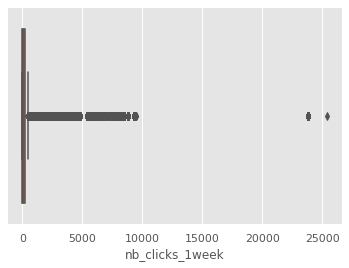

In [19]:
sns.boxplot(df_clean['nb_clicks_1week'])

<div style="direction:rtl">
    همان‌طور که از نمودار مشخص است، دسته‌ای از داده‌ها فاصله خیلی زیادی از محل اجتماع دیگر داده‌ها دارند و داده پرت محسوب می‌شوند. برای حذف آن از یک حد نصاب ۱۰۰۰۰ کلیکی استفاده می‌کنیم و داده‌های با بیشتر از این تعداد کلیک را به عنوان داده پرت به حالت ناموجود در می‌آوریم.
    <br>
    نهایتا داده‌های ناموجود این ستون را با مقدار میانگین مقادیر موجود ستون جایگزین می‌کنیم. در این حالت میانگین همچنین ثابت می‌ماند و چون داده‌های پرت حذف شده‌اند متاثر از آن‌ها نمی‌شود.
</div>

In [20]:
nb_clicks_1week_thresh = 10000
df_clean.loc[(df_clean['nb_clicks_1week'] > nb_clicks_1week_thresh), 'nb_clicks_1week'] = np.nan
df_clean['nb_clicks_1week'].fillna((df_clean['nb_clicks_1week'].mean()), inplace=True)

df_clean.head()

,Sale,nb_clicks_1week,click_day,click_hour,product_age_group_4C90FD52FC53D2C1C205844CB69575AB,product_age_group_88460293E9517D21E39AA889BD5AADC8,product_age_group_921B36149E5B081FD24450BFE2CE4430,product_age_group_0CD76C7030D0900BE250C8D41703D180,product_age_group_538912C31E773613AB51FBAE58492476,product_age_group_E7BD5A29457B8E92582951B586319A9C,...,partner_id_D4098AB6DE99DE5E06891CBE2EE79872,partner_id_65BE412B627B5238D9E1171D1E703AEE,partner_id_83E25F2B5B2FE35217739656A9668861,partner_id_FE1653DA62B96FA58F9130959F9AAF24,partner_id_BC24F033D166444EEB6CC79BF6213A72,partner_id_2AAA4123BE41F050F159BD574800464F,partner_id_056906B0FA5C6FA20341447DE45B24A7,partner_id_E0E30331BB16EE48CC654D385016E14C,partner_id_EB56C4AA9117C45E651F0BBC8B501F14,partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A
2,0.0,400.715251,4,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1064.000000,3,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,618.000000,4,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,505.000000,4,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,22.000000,4,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='nb_clicks_1week'>

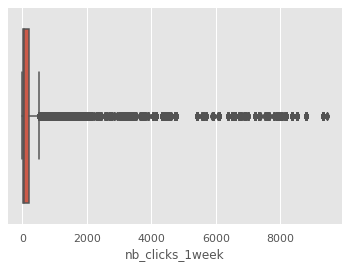

In [21]:
sns.boxplot(df_clean['nb_clicks_1week'])

<div style="direction:rtl">
در نهایت  وضعیت آماری ستون‌های داده به صورت زیر است:
</div>

In [22]:
df_clean.describe()

,Sale,nb_clicks_1week,click_day,click_hour,product_age_group_4C90FD52FC53D2C1C205844CB69575AB,product_age_group_88460293E9517D21E39AA889BD5AADC8,product_age_group_921B36149E5B081FD24450BFE2CE4430,product_age_group_0CD76C7030D0900BE250C8D41703D180,product_age_group_538912C31E773613AB51FBAE58492476,product_age_group_E7BD5A29457B8E92582951B586319A9C,...,partner_id_D4098AB6DE99DE5E06891CBE2EE79872,partner_id_65BE412B627B5238D9E1171D1E703AEE,partner_id_83E25F2B5B2FE35217739656A9668861,partner_id_FE1653DA62B96FA58F9130959F9AAF24,partner_id_BC24F033D166444EEB6CC79BF6213A72,partner_id_2AAA4123BE41F050F159BD574800464F,partner_id_056906B0FA5C6FA20341447DE45B24A7,partner_id_E0E30331BB16EE48CC654D385016E14C,partner_id_EB56C4AA9117C45E651F0BBC8B501F14,partner_id_913A7F7053B85ACBCCB6CFCEF98DD79A
count,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,...,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000,54498.000000
mean,0.137069,400.715251,3.599013,11.557030,0.328728,0.050828,0.043781,0.016368,0.004312,0.002606,...,0.000128,0.000092,0.000055,0.000055,0.000037,0.000037,0.000018,0.000018,0.000018,0.000018
std,0.343924,1206.384484,0.490103,7.004327,0.469755,0.219647,0.204610,0.126886,0.065525,0.050979,...,0.011333,0.009578,0.007419,0.007419,0.006058,0.006058,0.004284,0.004284,0.004284,0.004284
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,210.000000,4.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,9444.000000,4.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
print(f'number of positive labels: {df_clean[df_clean["Sale"] == 1].shape[0]}')
print(f'number of negative labels: {df_clean[df_clean["Sale"] == 0].shape[0]}')

number of positive labels: 7470
number of negative labels: 47028


<div style="direction:rtl">
    همانطور که مشخص است، تعداد داده‌های کلاس منفی
    (خرید‌نشده)
    بسیار بیشتر از تعداد داده‌های با برچسب مثبت 
    (خریدشده)
    است. بنابراین یک عدم تعادل آشکار بین تعداد داده‌ها در کلاس‌های مختلف داریم که این نکته اثر بدی روی یادگیری اکثر الگوریتم‌های یادگیری ماشین داشته و منجر به نتایج ضعیفی می‌شود.
    پس نیاز داریم تعادل را به یک روش مناسب به دیتاست برگردانیم تا تعداد داده‌های هر کلاس حدودا برابر باشد.
    <br>
    برای این منظور، تکنیک‌های 
    ReSampling
    یک راهکار مناسب هستند. در یکی از این روش‌ها به نام
    under sampling
    سعی می‌کنیم تعدادی از داده‌های کلاس غالب را حذف کنیم تا اندازه آن کلاس تقریبا برابر با تعداد داده‌های کلاس
    minor
    شود. اما در این روش تعداد داده‌ها کاهش چشمگیری دارد و از دست دادن دیتایی که ممکن است باارزش هم باشد
    گزینه خوبی برای برخورد با این مشکل نیست.
    پس از این تکنیک استفاده نمی‌کنیم.
    <br>
    در یک روش دیگر به نام
    over sampling
    سعی می‌کنیم با تکرار تعدادی از داده‌های کلاس
    minor
    تعداد داده‌های این کلاس را افزایش دهیم تا دیتاست متعادل شود. این روش مشکل از دست رفتن دیتا را هم ندارد و مناسب است. البته اطلاعات با ارزشی هم اضافه نمی‌کند و صرفا متعادل‌سازی را انجام می‌دهد. این روش در پایین پیاده شده است.
    <br>
    در روش سوم نیز از تکنیک
    generating synthetic samples
    استفاده می‌شود. این روش با استفاده از تکنیک‌هایی مانند نزدیک‌ترین همسایه‌ها، تعدادی داده جدید برای کلاس
    minor
    تولید می‌کند و حجم آن کلاس را افزایش و دیتاست را متعادل می‌کند. داده‌های جدید می‌توانند بعضی مواقع کارا باشند.
    این روش نیز در پایین پیاده‌سازی شده است ولی در عمل از
    oversampling
    استفاده کردیم.
    زیرا با آزمایش هر دو مشخص شد که تفاوت زیادی در معیارها پدید نمی‌آید و از روش 
    oversampling
    که سریع‌تر بود استفاده کردیم.
    <br>
    در هر صورت توجه کنید که عمل افزایش سایز کلاس
    minor
    صرفا روی داده‌های
    train
    باید انجام شود و قبل از اجرای این عمل باید داده‌های 
    test
    و 
    validation
    را جداسازی کرده باشیم تا این تغییرات ما را به اشتباه نندازند و اورفیت در یادگیری رخ ندهد.
    بنابراین ابتدا یک مجموعه داده
    validation
    با سایز ۰.۲ داده‌های اصلی حداسازی می‌کنیم.
</div>

In [25]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

OVERSAMPLE = True

if OVERSAMPLE:

    X_df = df_clean.drop('Sale', axis = 1)
    y_df = df_clean.Sale
    X_tr, X_te, y_tr, y_te = train_test_split(X_df, y_df, test_size=0.2, random_state=27)
    X_df = pd.concat([X_tr, y_tr], axis=1)
    X_VAL = pd.concat([X_te, y_te], axis = 1)
    clicked = X_df[X_df.Sale == 1]
    nonclick = X_df[X_df.Sale == 0]
    clicked_upsampling = resample(clicked,
                              replace=True, # sample with replacement
                              n_samples=len(nonclick), # match number in majority class
                              random_state=27) # reproducible results
    upsampled = pd.concat([nonclick, clicked_upsampling])
    
else:

    X_df = df_clean.drop('Sale', axis = 1)
    y_df = df_clean.Sale
    X_tr, X_te, y_tr, y_te = train_test_split(X_df, y_df, test_size=0.2, random_state=27)
    X_VAL = pd.concat([X_te, y_te], axis = 1)

    sm = SMOTE(random_state=27)
    X_tr, y_tr = sm.fit_resample(X_tr, y_tr)
    upsampled = pd.concat([X_tr, y_tr], axis=1)


ModuleNotFoundError: No module named 'imblearn'

In [27]:
print(f'number of positive labels: {upsampled[upsampled.Sale == 1].shape[0]}')
print(f'number of negative labels: {upsampled[upsampled.Sale == 0].shape[0]}')
print(f'shape: {upsampled.shape}')

NameError: name 'upsampled' is not defined

<div style="direction:rtl">
مشاهده می‌کنیم با وجود افزایش تعداد سطرهای کلی دیتاست، تعداد داده‌های مربوط به هر دو کلاس مثبت و منفی با هم برابر شده است و توازن به دیتاست ترین بازگشته است.
    <br>
    حال نیاز است ابعاد داده‌ها را کاهش دهیم زیرا تعداد ستون‌ها بسیار زیاد است و با توجه به مقدار مموری در دسترس ما
    امکان ایجاد مشکل و کرش کردن در هنگام آموزش مدل‌ها است.
    از روش معروف و کاربردی PCA برای کاهش ابعاد داده‌ها استفاده می‌کنیم.
</div>

<div style="direction:rtl">
کاهش ابعاد داده‌های آموزشی:
</div>

In [23]:
from sklearn.decomposition import PCA

y_train_label = upsampled['Sale'].to_numpy()
X = upsampled.drop('Sale', axis=1).to_numpy()
PCA_N_COMP = 20
pca = PCA(n_components=PCA_N_COMP)
pca_projection = pca.fit(X)
singular_values = pca_projection.singular_values_
print(f'singular values:\n{singular_values}')

eigen_vectors = pca_projection.components_.T
print(f'\neigen vectors:\n{eigen_vectors}')

saved_variance = sum(pca_projection.explained_variance_ratio_) * 100
print(f'\nsaved variance: {saved_variance}%')

compact_data_train = pca_projection.transform(X)
print(f'Compact Train Data Shape: {compact_data_train.shape}')
print(f'Train Label Shape: {y_train_label.shape}')

<div style="direction:rtl">
ابعاد داده‌ها به ۲۰ کاهش پیدا کرد. همانطور که مشخص است تقریبا ۱۰۰ درصد از واریانس داده‌ها حفظ شده است و پس از کاهش بعد اطلاعات خیلی کمی از دست رفته است و مشکلی ایجاد نمی‌شود.
</div>

<div style="direction:rtl">
کاهش ابعاد داده‌های Validation:
</div>

In [24]:
from sklearn.decomposition import PCA

y_test_label = X_VAL['Sale'].to_numpy()
X = X_VAL.drop('Sale', axis=1).to_numpy()
PCA_N_COMP = 20
pca = PCA(n_components=PCA_N_COMP)
pca_projection = pca.fit(X)
singular_values = pca_projection.singular_values_
print(f'singular values:\n{singular_values}')

eigen_vectors = pca_projection.components_.T
print(f'\neigen vectors:\n{eigen_vectors}')

saved_variance = sum(pca_projection.explained_variance_ratio_) * 100
print(f'\nsaved variance: {saved_variance}%')

compact_data_test = pca_projection.transform(X)
print(f'Compact Validation Data Shape: {compact_data_test.shape}')
print(f'Validation Label Shape: {y_test_label.shape}')

singular values:
[2.81625566e+05 1.95951911e+03 2.27897980e+02 1.82605963e+02
 1.43315381e+02 1.32605688e+02 1.21426465e+02 1.16830893e+02
 1.10427506e+02 1.04333918e+02 9.20061755e+01 8.95625137e+01
 8.83219536e+01 8.03854573e+01 7.58266646e+01 7.49143333e+01
 7.31859971e+01 6.88547066e+01 6.77420298e+01 6.58188114e+01]

eigen vectors:
[[ 9.99999916e-01  2.80208938e-04 -9.45513672e-05 ... -1.25665546e-06
   9.58497522e-06  2.34027124e-05]
 [ 2.22057408e-05 -4.45125336e-02  2.16230318e-02 ... -4.61742677e-04
  -2.62672164e-03  9.10421641e-04]
 [-2.77536409e-04  9.98837291e-01  1.63655308e-02 ...  2.67930349e-04
   1.03748549e-03  2.59202759e-04]
 ...
 [-5.05235891e-09  2.10981588e-06  2.41152451e-05 ... -9.25529078e-05
  -1.68132857e-05 -1.24463587e-05]
 [-5.00191113e-09  1.06012185e-06  7.42414548e-06 ...  2.97311041e-06
   9.85487980e-06 -1.37562557e-05]
 [-5.03970685e-09 -1.01896465e-06  5.96569149e-06 ... -1.05542291e-07
   4.88371404e-05  6.89945645e-07]]

saved variance: 99.99975

<div>
    <h1>Models & Results</h1>
    <hr>
</div>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from keras.models import Sequential
from keras.layers import Dense
import keras
import keras_tuner as kt
import tensorflow as tf

<div style="direction:rtl">
    داده‌هایی که در بخش قبل پیش‌پردازش کرده‌ایم را به صورت مرتب داخل متغیرهای زیر قرار می‌دهیم.
</div>

In [ ]:
X_train = compact_data_train
Y_train = y_train_label

X_test = compact_data_test
Y_test = y_test_label

<div style="direction:rtl">
    مدل اول:
    <br>
    در این مدل از یک شبکه عصبی عمیق با تعدادی لایه محدود استفاده کرده‌ایم.
    این مدل شامل ۳ لایه از نورون‌های با تابع فعال‌ساز 
    ReLU
    و یک لایه خروجی با تک نورون سیگمویدی است که احتمال تعلق داده با فیچرهای ورودی به کلاس مثبت را نمایش می‌دهد.
    این مدل دارای معیار 
    binary cross entropy loss
    برای بهینه‌سازی بوده و از الگوریتم آدام برای بهینه‌سازی استفاده می‌کند. همچنین برای تعیین هایپر پارامترهایی مانند
    learning rate 
    و
     تعداد خروجی‌های بهینه لایه اول از
    Tune
    کردن استفاده می‌کنیم.
</div>

In [ ]:
def model_build(hp):
    model = Sequential()
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, input_dim=20, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])

    return model

<div style="direction:rtl">
    در زیر مراحل
    tune
    کردن پارامترها برای به دست آوردن پارامترهای بهینه مدل که در قسمت قبل به آن اشاره شده است طی شده است.
    برای این کار از کتابخانه 
    keras_tuner
    استفاده کرده‌ایم که با دریافت داده‌های آموزشی و تعریف یک معیار بهینه‌سازی که در اینجا
    accuracy
    است سعی می‌کند با چندین بار اجرای مدل در تعدادی
    epoch
    ،
    هایپر پارامترهای بهینه را انتخاب کند.
    همچنین در نهایت پارامترهایی که انتخاب شده است در خروجی چاپ شده است.
    <br>
    البته در ابتدای کار این پارامترها را خودمان به صورت دستی مقداردهی کرده بودیم ولی به دلیل پایین بودن معیارها، تصمیم گرفتیم بهینه‌ترین پارامترها را برای مدل انتخاب کنیم تا حداقل از این لحاظ باعث کم شدن دقت و معیار بهینگی مدل نشویم.
</div>

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_build,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='ml_pro_tuning')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, Y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

<div style="direction:rtl">
    حال مدلی که هایپر پارامترهای بهینه برای آن ست شده است را انتخاب کرده و آن را
    با استفاده از داده‌های آموزشی خود در ۵۰
    epoch
    آموزش می‌دهیم. در این حین مقدار
    val_accuracy
    را به عنوان ملاک بهینگی در طی این اجراها ذخیره کرده و نهایتا شماره
    epoch
    ای که در آن بهترین معیار را داشتیم به عنوان تعداد 
    epoch 
    مناسب برای آموزش مدل اصلی خود انتخاب و ذخیره می‌کنیم تا در مرحله بعد از آن استفاده می‌کنیم.
</div>

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

<div style="direction:rtl">
    در نهایت، با استفاده از پارامترهای بهینه شده و تعداد epoch مناسبی که در مراحل قبل پیدا کردیم،
    مدل نهایی خود را آموزش می‌دهیم.
    ضریب
    validation
    را برابر با ۰.۲ در نظر می‌گیریم.
</div>

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, Y_train, epochs=best_epoch, validation_split=0.2)

<div style="direction:rtl">
    پس از انجام آموزش، دقت
    (accuracy)
    مدل یادگرفته‌شده روی داده‌های آموزش به صورت زیر است.
</div>

In [ ]:
_, accuracy = hypermodel.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))
hypermodel.save('keras_model.h5')

<div style="direction:rtl">
    نتایج اجرای پیش‌بینی روی داده‌های تستی ک در مرحله پیش‌پردازش جدا کردیم با استفاده از مدل آموزش‌داده‌شده به صورت مشروح در زیر آمده است.
</div>

In [ ]:
from sklearn.metrics import classification_report

y_pred = hypermodel.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = (y_pred > 0.5).astype(int)

print(classification_report(Y_test, y_pred_bool))

<div style="direction:rtl">
    همچنین معیار مهم f1_score
    با استفاده از
    average
    های مختلف در زیر نشان داده شده است.
</div>

In [ ]:
from sklearn.metrics import f1_score

print("macro f1: ",(f1_score(Y_test, y_pred_bool, average='macro')))
print("micro f1: ", f1_score(Y_test, y_pred_bool, average='micro'))
print("binary f1: ", f1_score(Y_test, y_pred_bool, average=None))
print("f1: ", f1_score(Y_test, y_pred_bool))

<div style="direction:rtl">
    این مقدار 
    f1_score
    به نظر پایین و نامناسب می‌آید. عمل 
    Classification
    را با استفاده از چند مدل دیگر نمایش می‌دهیم و مقدار این معیار را برای آن‌ها به دست می‌آوریم تا دریابیم مشکل از مدل است یا عامل دیگری مانند داده‌ی نامناسب در این مقدار کم تاثیر دارد.
</div>

<div style="direction:rtl">
    مدل دوم:
    <br>
    در این قسمت از یک مدل آماده
    Random Forest
    استفاده می‌کنیم. از پارامتر
    n_estimators
    با مقدار ۱۰ استفاده می‌کنیم و به سادگی آن را روی داده‌های آموزشی
    اجرا می‌کنیم.
    <br>
    نتایج پیش‌بینی این مدل روی داده‌های تست را به تفصیل در زیر مشاهده می‌کنیم.
</div>

In [ ]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(Y_test, rfc_pred))
print("macro f1: ",(f1_score(Y_test, rfc_pred, average='macro')))
print("micro f1: ", f1_score(Y_test, rfc_pred, average='micro'))
print("binary f1: ", f1_score(Y_test, rfc_pred, average=None))
print("f1: ", f1_score(Y_test, rfc_pred))

<div style="direction:rtl">
    در طی اجراهای متعددی که از این مدل گرفتیم، معیار 
    f1_score
    این مدل غالبا کمتر از مدل شبکه عصبی اول است و نتیجه ضعیف‌تری می‌دهد.
</div>

<div style="direction:rtl">
    مدل سوم:
    <br>
    در این حالت از یک مدل آماده XGBoost
    که در داک هم اشاره شده بود استفاده کرده‌ایم. این کتابخانه یک مدل
    optimized distributed gradient boosting
    در اختیار ما قرار می‌دهد. پارامتر نرخ یادگیری آن را برابر ۰.۳
    که مقدار دیفالت مدل است قرار می‌دهیم. مقدار پارامتر حداکثر عمق را برابر ۵ قرار می‌دهیم.
    اگر مقدار آن را زیاد قرار دهیم اورفیت مشاهده می‌کنیم. مقدار انتخاب شده طی اجراهای متفاوت دقت متعادل و متناسبی داد.
    <br>
    اجازه می‌دهیم یادگیری در ۳۰ گام صورت بگیرد. مقداری که بر اساس آن بهینه‌سازی انجام می‌شود معیار
    binary logitraw
    است.
    <br>
    البته برای استفاده از این مدل باید داده‌ها را به صورت خاصی در قالب یک کلاس
    DMatrix
    که فیچرهای ورودی را در کنار لیبل‌شان به مدل می‌دهد، دربیاوریم.
</div>

In [ ]:
import xgboost as xg

param = {
    'eta': 0.3,
    'max_depth': 5,
    'objective': 'binary:logitraw'
}

step = 30

Data_train = xg.DMatrix(X_train, label=Y_train)
Data_val = xg.DMatrix(X_test, label=Y_test)

<div style="direction:rtl">
    پس از اجرا شرح کامل نتایج پیش‌بینی را در زیر می‌بینیم. این مدل غیر عمیق در طی اجراهای متعدد مقدار
    f1_score 
    گاها برابر و گاها کمتر از مدل اول را به دست می‌دهد. همچنین مقدار اسکور این مدل از مدل دوم یعنی
    RandomForest
    به صورت کلی بیشتر و مدل دقیق‌تر و بهتری است.
</div>

In [ ]:
model = xg.train(param, Data_train, step)

xg_preds = model.predict(Data_val)
xg_preds = xg_preds > 0

print(classification_report(Y_test, xg_preds))
print("macro f1: ",(f1_score(Y_test, xg_preds, average='macro')))
print("micro f1: ", f1_score(Y_test, xg_preds, average='micro'))
print("binary f1: ", f1_score(Y_test, xg_preds, average=None))
print("f1: ", f1_score(Y_test, xg_preds))

<div style="direction:rtl">
    مدل چهارم:
    دز این مدل سعی کرده‌ایم یک نمونه ساده از
    Deep Factorization Machine
    مشابه لینک قرار داده‌شده پیاده‌سازی کرده‌ایم.
    از پایتورچ برای پیاده‌سازی استفاده کرده‌ایم. یک کلاس مربوط به دیتاست مخصوص این مدل پیاده کرده‌ایم. همچنین دی ساختار شبکه عمیق آن از تعداد مشخصی لایه‌های
    Linear, ReLU, Dropout
    .که توسط یک پارامتر خارجی تعیین می‌شود تشکیل شده‌است
همچنین بخش 
    Factorization
    آن از یک لایه 
    Linear
    ساده تشکیل شده است. نتیجه این مدل حاصل از جمع بخش
    Factorization
    و بخش عمیق و ضریبی از واریانس داده‌های ورودی است.
    
</div>

In [ ]:
import torch
import torch.nn as nn
import tqdm

from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

class DeepFMDataset(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i: int):
        return self.X[i], self.Y[i]
    

data_set_t = DeepFMDataset(X_train, Y_train)
data_set_v = DeepFMDataset(X_test, Y_test)

train_loader = DataLoader(dataset=data_set_t, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=data_set_v, batch_size=32, shuffle=False)

    
class DeepFM(nn.Module):

    def __init__(self, field_dims, num_factors, mlp_dims, drop_rate=0.1):
        super(DeepFM, self).__init__()
        num_inputs = int(field_dims[0]*field_dims[1])
        self.embedding = nn.Embedding(num_inputs, num_factors)
        input_dim = self.embed_output_dim = int(field_dims[0]) * num_factors
        self.linear_layer = nn.Sequential(nn.Linear(input_dim, 1), nn.ReLU())
        self.mlp = []
        for dim in mlp_dims:
            self.mlp.append(nn.Linear(input_dim, dim))
            self.mlp.append(nn.ReLU())
            self.mlp.append(nn.Dropout(p=drop_rate))
            input_dim = dim
        self.mlp.append(nn.Linear(input_dim, 1))
        self.mlp = nn.Sequential(*self.mlp)
        self.flatten = nn.Flatten()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x1):
        embed_x = torch.Tensor(self.embedding(x1.to(torch.int64)))
        square_of_sum = torch.sum(embed_x, axis=1) ** 2
        sum_of_square = torch.sum(embed_x ** 2, axis=1)
        inputs = np.reshape(embed_x, (-1, self.embed_output_dim))
        z = self.linear_layer(inputs)\
         + 0.5 * (square_of_sum - sum_of_square).sum(1, keepdims=True)\
         + self.mlp(inputs)
        return self.sigmoid(z)

<div style="direction:rtl">
    با آموزش دادن این مدل در دفعات مختلف به نظر می‌رسد که دقت آن‌چنان خوبی به دست نمی‌دهد و
    f1_score
    آن در حالت
    average = macro
    در حدود ۳۵
    و در حالت عادی حوالی ۲۳ است. 
    با توجه به این‌که این مدل نسبتا قدرتمند است این ضعف می‌تواند ناشی از این باشد که نحوه پیش‌پردازش داده‌های ما برای این مدل خاص مناسب نبوده است و یا این که در پیاده‌سازی آن اشتباهی صورت گرفته است. لازم به ذکر است پیاده کردن این مدل چالش‌ها و باگ‌های عجیبی داشت و توان و زمان زیادی از گروه را صرف کرد.
</div>

In [ ]:
model = DeepFM(X.shape, num_factors=10, mlp_dims=[30, 20, 10]).to(device)
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

val_loss_min = float('inf')

for epoch in range(num_epochs):
    train_loss = 0
    N_train = len(train_loader.dataset)

    model.train()
    with tqdm.tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, y) in pbar:
            optimizer.zero_grad()

            x = x.to(device)
            y = y.view(-1, 1).to(device)
            p = model(x)

            loss = criterion(p, y)
            train_loss += loss.item() * len(x)

            pbar.set_description(f'Epoch:{epoch}, Train Loss: {train_loss / N_train:.3e}')
            
            loss.backward()
            optimizer.step()
    
    train_loss /= N_train
    
    val_loss = 0
    N_val = len(val_loader.dataset)

    model.eval()
    with torch.no_grad(), tqdm.tqdm(enumerate(val_loader), total=len(val_loader)) as pbar:
        for i, (x, y) in pbar:
            x = x.to(device)
            y = y.view(-1, 1).to(device)

            p = model(x)
            loss = criterion(p, y)
            val_loss += loss.item() * len(x)

            pbar.set_description(f'Epoch:{epoch}, Val Loss: {val_loss / N_val:.3e}')
    
    val_loss /= N_val

    if val_loss <= val_loss_min:
        torch.save(model.state_dict(), 'best_deepfm.pt')
        val_loss_min = val_loss

model.load_state_dict(torch.load('best_deepfm.pt'))

val_preds = model(X_test.to(device)).view(-1) >= 0

print(classification_report(Y_test, val_preds.cpu()))
print("macro f1: ",(f1_score(Y_test, val_preds.cpu(), average='macro')))
print("micro f1: ", f1_score(Y_test, val_preds.cpu(), average='micro'))
print("binary f1: ", f1_score(Y_test, val_preds.cpu(), average=None))
print("f1: ", f1_score(Y_test, val_preds.cpu()))

<div style="direction:rtl">
    در نهایت از میان تمام مدل‌های بررسی‌شده، مدل اول یعنی شبکه عصبی عمیق دست‌نویس
    خودمان را به عنوان مدل نهایی مورد نظرمان بر می‌گزینیم. این مدل به نسبت دیگر مدل عمیق یعنی 
    Deep Factorization Machine
    تعداد پارامترهای کمتری داشت و به سادگی بیشتری یاد گرفته می‌شد
    (البته با صرف نظر از بخش یافتن پارامترهای بهینه و تعداد اجرای مناسب)
    .
    در ضمن معیار
    f_score
    این مدل در غالب موارد اجراشده از تمام ۳ مدل تست‌شده دیگر بیشتر و یا مساوی بوده است.
    پیچیدگی این مدل باعث می‌شود که با تست روی داده‌های با توزیع متفاوت‌تر نیز نتیجه نسبتا قابل قبولی بدهد.
    این مدل به طور میانگین در اجراهای متفاوت مقدار
    f1_score(average=macro)
    حدودا ۵۰ درصد و 
    f1_score
    حدودا 
    ۲۷.۵
    را به دست می‌داد.
    <br>
    در ابتدا اشاره کردیم که این مقدار برای اسکور به نظر غیر قابل قبول و کم است اما حال با تست مدل‌های دیگر روی همین داده و به کار گرفتن ترفندهای متفاوت دریافتیم که نمی‌توان این مقدار را خیلی بهبود داد. این موضوع باعث تقویت این فرضیه می‌شود که دیتاهای موجود در این دیتاست به گونه‌ای هستند که عمل یادگیری روی آن‌ها نمی‌تواند از حدید دقیق‌تر صورت بگیرد و عواملی مانند تعداد خانه‌های خالی فراوان و مقادیر هش‌شده و ... تاثیر بدی بر یادگیری مدل‌ها با این دیتاست گذاشته‌اند. در ادامه مجددا تشریح نتایج مدل اول که مدل انتخابی ما است را مشاهده می‌کنید.
</div>

In [ ]:
print(classification_report(Y_test, y_pred_bool))
print("macro f1: ",(f1_score(Y_test, y_pred_bool, average='macro')))
print("micro f1: ", f1_score(Y_test, y_pred_bool, average='micro'))
print("binary f1: ", f1_score(Y_test, y_pred_bool, average=None))
print("f1: ", f1_score(Y_test, y_pred_bool))